<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/team-project/modeling-dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# data path
dpath = "/content/drive/MyDrive/"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 딥러닝 모형

In [4]:
train_h1n1_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_h1n1_ver1.csv')
train_seasonal_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_seasonal_ver1.csv')

In [5]:
print(train_h1n1_ver1.shape)
train_h1n1_ver1.head()

(24828, 24)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,2.0,4,1,1,8,1,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,4.0,4.0,2,1,2,1,2,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1,1,2,9,2,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3.0,5.0,5,1,1,5,3,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,2.0,3,1,1,9,2,1.0,0.0,0


In [6]:
from sklearn.model_selection import train_test_split

feature = train_h1n1_ver1.iloc[:,1:-1]
target = train_h1n1_ver1['h1n1_vaccine']

x_train_h1n1_ver1, x_valid_h1n1_ver1, y_train_h1n1_ver1, y_valid_h1n1_ver1 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                              stratify=target,  random_state=1234) 

### 1 : 기본 레이어 3개

In [7]:
## loss: 0.4390 - accuracy: 0.8098 - val_loss: 0.4555 - val_accuracy: 0.8004
## loss: 0.4379 - accuracy: 0.8089 - val_loss: 0.4540 - val_accuracy: 0.7996
## loss: 0.4369 - accuracy: 0.8092 - val_loss: 0.4529 - val_accuracy: 0.8039



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1 = keras.Sequential([
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1.compile(optimizer = "rmsprop",
                        loss = "binary_crossentropy",
                        metrics = ["accuracy"])



# fitting model

history_h1n1_ver1 = model_h1n1_ver1.fit(x_train_h1n1_ver1,
                                        y_train_h1n1_ver1,
                                        epochs = 20,
                                        batch_size = 512,
                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 4s 9ms/step - loss: 0.5245 - accuracy: 0.7835 - val_loss: 0.5078 - val_accuracy: 0.7823
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4994 - accuracy: 0.7865 - val_loss: 0.4946 - val_accuracy: 0.7847
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4854 - accuracy: 0.7909 - val_loss: 0.4871 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4766 - accuracy: 0.7938 - val_loss: 0.4808 - val_accuracy: 0.7922
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4702 - accuracy: 0.7977 - val_loss: 0.4757 - val_accuracy: 0.7946
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4646 - accuracy: 0.7997 - val_loss: 0.4715 - val_accuracy: 0.7976
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4604 - accuracy: 0.8017 - val_loss: 0.4689 - val_accuracy: 0.8002
Epoch 8/20
39/39 [==

### 2 : 기본 레이어 8개
- 레이어를 많이 쌓을수록 정확도가 증가함, 모델의 성능이 좋아짐

In [8]:
## loss: 0.4053 - accuracy: 0.8209 - val_loss: 0.4523 - val_accuracy: 0.7988
## loss: 0.3947 - accuracy: 0.8295 - val_loss: 0.4539 - val_accuracy: 0.8083
## loss: 0.3946 - accuracy: 0.8300 - val_loss: 0.4770 - val_accuracy: 0.8035



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1 = keras.Sequential([
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(128, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1.compile(optimizer = "rmsprop",
                        loss = "binary_crossentropy",
                        metrics = ["accuracy"])



# fitting model

history_h1n1_ver1 = model_h1n1_ver1.fit(x_train_h1n1_ver1,
                                        y_train_h1n1_ver1,
                                        epochs = 20,
                                        batch_size = 512,
                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.5072 - accuracy: 0.7872 - val_loss: 0.4850 - val_accuracy: 0.7845
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4688 - accuracy: 0.7978 - val_loss: 0.4772 - val_accuracy: 0.7920
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4633 - accuracy: 0.7998 - val_loss: 0.4650 - val_accuracy: 0.7966
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4525 - accuracy: 0.8045 - val_loss: 0.4649 - val_accuracy: 0.8053
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4502 - accuracy: 0.8054 - val_loss: 0.4652 - val_accuracy: 0.7950
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4436 - accuracy: 0.8093 - val_loss: 0.4545 - val_accuracy: 0.8075
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4422 - accuracy: 0.8092 - val_loss: 0.4541 - val_accuracy: 0.8055
Epoch 8/20
39/39 [=

## L1, L2 regularization effect

### layer 8개 + L1 regularization 1개

In [10]:
## loss: 0.4478 - accuracy: 0.8116 - val_loss: 0.4607 - val_accuracy: 0.8091
## loss: 0.4432 - accuracy: 0.8161 - val_loss: 0.4617 - val_accuracy: 0.8069
## loss: 0.4400 - accuracy: 0.8159 - val_loss: 0.4609 - val_accuracy: 0.8085



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_1 = model_h1n1_ver1_L1_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 10ms/step - loss: 1.8873 - accuracy: 0.7716 - val_loss: 1.3764 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 1.0645 - accuracy: 0.7953 - val_loss: 0.7947 - val_accuracy: 0.7932
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.6448 - accuracy: 0.8002 - val_loss: 0.5570 - val_accuracy: 0.8039
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5302 - accuracy: 0.8000 - val_loss: 0.5402 - val_accuracy: 0.7729
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5033 - accuracy: 0.8019 - val_loss: 0.4972 - val_accuracy: 0.8047
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4859 - accuracy: 0.8061 - val_loss: 0.4868 - val_accuracy: 0.8049
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4764 - accuracy: 0.8071 - val_loss: 0.4810 - val_accuracy: 0.8041
Epoch 8/20
39/39 [=

### layer 8개 + L1 regularization 2개

In [11]:
## loss: 0.4559 - accuracy: 0.8156 - val_loss: 0.4747 - val_accuracy: 0.8095
## loss: 0.4521 - accuracy: 0.8152 - val_loss: 0.4667 - val_accuracy: 0.8115
## loss: 0.4504 - accuracy: 0.8168 - val_loss: 0.4705 - val_accuracy: 0.8111



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_2 = model_h1n1_ver1_L1_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 2.0294 - accuracy: 0.7835 - val_loss: 1.5169 - val_accuracy: 0.7980
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 1.1901 - accuracy: 0.7926 - val_loss: 0.9020 - val_accuracy: 0.7952
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.7377 - accuracy: 0.7982 - val_loss: 0.6328 - val_accuracy: 0.8061
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5871 - accuracy: 0.8009 - val_loss: 0.5670 - val_accuracy: 0.8053
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5417 - accuracy: 0.8042 - val_loss: 0.5544 - val_accuracy: 0.8035
Epoch 6/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5175 - accuracy: 0.8056 - val_loss: 0.5142 - val_accuracy: 0.8081
Epoch 7/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5023 - accuracy: 0.8050 - val_loss: 0.5197 - val_accuracy: 0.7932
Epoch 8/20
39/39 [=

### layer 8개 + L2 regularization 1개

In [12]:
## loss: 0.4100 - accuracy: 0.8219 - val_loss: 0.4545 - val_accuracy: 0.7978
## loss: 0.4119 - accuracy: 0.8213 - val_loss: 0.4513 - val_accuracy: 0.8087
## loss: 0.4046 - accuracy: 0.8270 - val_loss: 0.4522 - val_accuracy: 0.8041




from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_1 = model_h1n1_ver1_L2_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.6230 - accuracy: 0.7792 - val_loss: 0.5654 - val_accuracy: 0.7910
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5314 - accuracy: 0.7963 - val_loss: 0.5505 - val_accuracy: 0.7666
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4933 - accuracy: 0.8005 - val_loss: 0.5034 - val_accuracy: 0.7821
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4769 - accuracy: 0.8033 - val_loss: 0.4838 - val_accuracy: 0.8012
Epoch 5/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4640 - accuracy: 0.8068 - val_loss: 0.4785 - val_accuracy: 0.8067
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4572 - accuracy: 0.8064 - val_loss: 0.4985 - val_accuracy: 0.7714
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4522 - accuracy: 0.8102 - val_loss: 0.4657 - val_accuracy: 0.8075
Epoch 8/20
39/39 [=

### layer 8개 + L2 regularization 2개

In [13]:
## loss: 0.4104 - accuracy: 0.8234 - val_loss: 0.4648 - val_accuracy: 0.8115
## loss: 0.4155 - accuracy: 0.8243 - val_loss: 0.4608 - val_accuracy: 0.8071
## loss: 0.4105 - accuracy: 0.8206 - val_loss: 0.4517 - val_accuracy: 0.8047



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_2 = model_h1n1_ver1_L2_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.6428 - accuracy: 0.7808 - val_loss: 0.5819 - val_accuracy: 0.7876
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5443 - accuracy: 0.7954 - val_loss: 0.5310 - val_accuracy: 0.7940
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5068 - accuracy: 0.7972 - val_loss: 0.4974 - val_accuracy: 0.8059
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4844 - accuracy: 0.8004 - val_loss: 0.4836 - val_accuracy: 0.8073
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4727 - accuracy: 0.8057 - val_loss: 0.5025 - val_accuracy: 0.7729
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4648 - accuracy: 0.8063 - val_loss: 0.4699 - val_accuracy: 0.8045
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4573 - accuracy: 0.8085 - val_loss: 0.4799 - val_accuracy: 0.8089
Epoch 8/20
39/39 [=

### layer 8개 + L1&L2 regularization 1개

In [14]:
## loss: 0.4500 - accuracy: 0.8158 - val_loss: 0.4707 - val_accuracy: 0.8127
## loss: 0.4509 - accuracy: 0.8160 - val_loss: 0.4650 - val_accuracy: 0.8103
## loss: 0.4507 - accuracy: 0.8181 - val_loss: 0.4669 - val_accuracy: 0.8101



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L12 = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L12.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L12 = model_h1n1_ver1_L12.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 13ms/step - loss: 2.1120 - accuracy: 0.7755 - val_loss: 1.5613 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 9ms/step - loss: 1.1962 - accuracy: 0.7859 - val_loss: 0.8990 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 8ms/step - loss: 0.7280 - accuracy: 0.7879 - val_loss: 0.6200 - val_accuracy: 0.7867
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5807 - accuracy: 0.7977 - val_loss: 0.5736 - val_accuracy: 0.8006
Epoch 5/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5365 - accuracy: 0.8014 - val_loss: 0.5306 - val_accuracy: 0.8041
Epoch 6/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5102 - accuracy: 0.8045 - val_loss: 0.5071 - val_accuracy: 0.8051
Epoch 7/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4947 - accuracy: 0.8058 - val_loss: 0.4964 - val_accuracy: 0.8067
Epoch 8/20
39/39 [=

### visualize

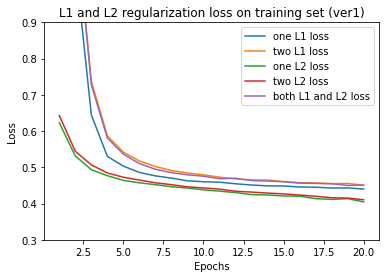

In [48]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_L1_1 = history_h1n1_ver1_L1_1.history
history_dict_h1n1_ver1_L1_2 = history_h1n1_ver1_L1_2.history
history_dict_h1n1_ver1_L2_1 = history_h1n1_ver1_L2_1.history
history_dict_h1n1_ver1_L2_2 = history_h1n1_ver1_L2_2.history
history_dict_h1n1_ver1_L12 = history_h1n1_ver1_L12.history

loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["loss"]
loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["loss"]
loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["loss"]
loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["loss"]
loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["loss"]


epochs = range(1, len(loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_L1_1, label="one L1 loss")
plt.plot(epochs, loss_values_h1n1_ver1_L1_2, label="two L1 loss")
plt.plot(epochs, loss_values_h1n1_ver1_L2_1, label="one L2 loss")
plt.plot(epochs, loss_values_h1n1_ver1_L2_2, label="two L2 loss")
plt.plot(epochs, loss_values_h1n1_ver1_L12, label="both L1 and L2 loss")


plt.title("L1 and L2 regularization loss on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.9])
plt.legend()
plt.show()

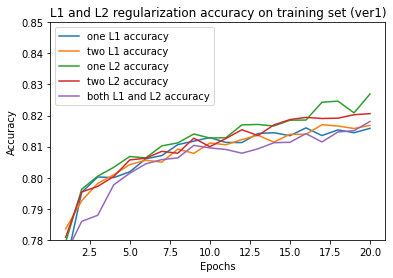

In [49]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["accuracy"]
acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["accuracy"]
acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["accuracy"]
acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["accuracy"]
acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_L1_1, label="one L1 accuracy")
plt.plot(epochs, acc_values_h1n1_ver1_L1_2, label="two L1 accuracy")
plt.plot(epochs, acc_values_h1n1_ver1_L2_1, label="one L2 accuracy")
plt.plot(epochs, acc_values_h1n1_ver1_L2_2, label="two L2 accuracy")
plt.plot(epochs, acc_values_h1n1_ver1_L12, label="both L1 and L2 accuracy")

plt.title("L1 and L2 regularization accuracy on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

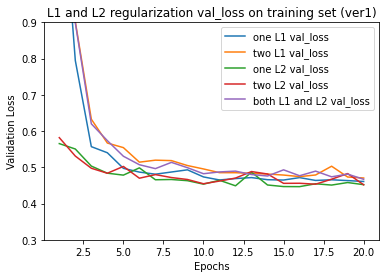

In [51]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_L1_1 = history_h1n1_ver1_L1_1.history
history_dict_h1n1_ver1_L1_2 = history_h1n1_ver1_L1_2.history
history_dict_h1n1_ver1_L2_1 = history_h1n1_ver1_L2_1.history
history_dict_h1n1_ver1_L2_2 = history_h1n1_ver1_L2_2.history
history_dict_h1n1_ver1_L12 = history_h1n1_ver1_L12.history

val_loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_loss"]
val_loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_loss"]
val_loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_loss"]
val_loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_loss"]
val_loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_L1_1, label="one L1 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver1_L1_2, label="two L1 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_1, label="one L2 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_2, label="two L2 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver1_L12, label="both L1 and L2 val_loss")


plt.title("L1 and L2 regularization loss on validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.3,0.9])
plt.legend()
plt.show()

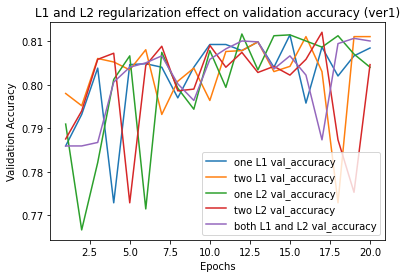

In [54]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_L1_1 = history_h1n1_ver1_L1_1.history
history_dict_h1n1_ver1_L1_2 = history_h1n1_ver1_L1_2.history
history_dict_h1n1_ver1_L2_1 = history_h1n1_ver1_L2_1.history
history_dict_h1n1_ver1_L2_2 = history_h1n1_ver1_L2_2.history
history_dict_h1n1_ver1_L12 = history_h1n1_ver1_L12.history


val_acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_accuracy"]
val_acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_accuracy"]
val_acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_accuracy"]
val_acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_accuracy"]
val_acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_L1_1, label="one L1 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver1_L1_2, label="two L1 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_1, label="one L2 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_2, label="two L2 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver1_L12, label="both L1 and L2 val_accuracy")


plt.title("L1 and L2 regularization effect on validation accuracy (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
## 0.005
## loss: 0.4242 - accuracy: 0.8189 - val_loss: 0.4744 - val_accuracy: 0.7716
## loss: 0.4292 - accuracy: 0.8171 - val_loss: 0.4516 - val_accuracy: 0.8127
## loss: 0.4224 - accuracy: 0.8204 - val_loss: 0.4515 - val_accuracy: 0.8093

## 0.002
## loss: 0.4171 - accuracy: 0.8211 - val_loss: 0.4966 - val_accuracy: 0.7602
## loss: 0.4244 - accuracy: 0.8180 - val_loss: 0.4668 - val_accuracy: 0.8087
## loss: 0.4161 - accuracy: 0.8234 - val_loss: 0.4549 - val_accuracy: 0.8023

## 0.001
## loss: 0.4252 - accuracy: 0.8197 - val_loss: 0.4554 - val_accuracy: 0.8019
## loss: 0.4104 - accuracy: 0.8234 - val_loss: 0.4648 - val_accuracy: 0.8115
## loss: 0.4155 - accuracy: 0.8243 - val_loss: 0.4608 - val_accuracy: 0.8071

## 0.0005
## loss: 0.4119 - accuracy: 0.8247 - val_loss: 0.4482 - val_accuracy: 0.8133
## loss: 0.4016 - accuracy: 0.8277 - val_loss: 0.4655 - val_accuracy: 0.7914
## loss: 0.4151 - accuracy: 0.8248 - val_loss: 0.4465 - val_accuracy: 0.8107

## 0.0001
## loss: 0.4109 - accuracy: 0.8227 - val_loss: 0.4585 - val_accuracy: 0.8047
## loss: 0.4053 - accuracy: 0.8275 - val_loss: 0.4588 - val_accuracy: 0.7938
## loss: 0.4030 - accuracy: 0.8259 - val_loss: 0.4830 - val_accuracy: 0.8053


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1 = keras.Sequential([
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1.compile(optimizer = "rmsprop",
                        loss = "binary_crossentropy",
                        metrics = ["accuracy"])



# fitting model

history_h1n1_ver1 = model_h1n1_ver1.fit(x_train_h1n1_ver1,
                                        y_train_h1n1_ver1,
                                        epochs = 20,
                                        batch_size = 512,
                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 17ms/step - loss: 0.5859 - accuracy: 0.7735 - val_loss: 0.5269 - val_accuracy: 0.7940
Epoch 2/20
39/39 [==============================] - 0s 10ms/step - loss: 0.5118 - accuracy: 0.7955 - val_loss: 0.5074 - val_accuracy: 0.7912
Epoch 3/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4900 - accuracy: 0.8010 - val_loss: 0.5376 - val_accuracy: 0.7729
Epoch 4/20
39/39 [==============================] - 0s 10ms/step - loss: 0.4758 - accuracy: 0.8021 - val_loss: 0.4781 - val_accuracy: 0.8047
Epoch 5/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4705 - accuracy: 0.8037 - val_loss: 0.5050 - val_accuracy: 0.7916
Epoch 6/20
39/39 [==============================] - 0s 10ms/step - loss: 0.4635 - accuracy: 0.8057 - val_loss: 0.4694 - val_accuracy: 0.8027
Epoch 7/20
39/39 [==============================] - 0s 10ms/step - loss: 0.4564 - accuracy: 0.8074 - val_loss: 0.4640 - val_accuracy: 0.8035
Epoch 8/20
39/3

9 : 기본 레이어 8개 + L2 규제 2개(하이퍼파라미터 변경 = 0.005, 0.002, 0.001, 0.0005, 0.0001) + 드롭아웃 추가
- dropout 늘어날수록 training loss 증가 & training accuracy 감소
- validation loss와 accuracy는 오히려 정체 or 증가 추세

In [ ]:
## 0.0005
## loss: 0.4119 - accuracy: 0.8247 - val_loss: 0.4482 - val_accuracy: 0.8133
## loss: 0.4016 - accuracy: 0.8277 - val_loss: 0.4655 - val_accuracy: 0.7914
## loss: 0.4151 - accuracy: 0.8248 - val_loss: 0.4465 - val_accuracy: 0.8107

## dropout 1개
## loss: 0.4121 - accuracy: 0.8255 - val_loss: 0.4603 - val_accuracy: 0.8085
## loss: 0.4125 - accuracy: 0.8247 - val_loss: 0.4780 - val_accuracy: 0.8057
## loss: 0.4110 - accuracy: 0.8225 - val_loss: 0.4504 - val_accuracy: 0.8099

## dropout 2개
## loss: 0.4185 - accuracy: 0.8164 - val_loss: 0.4493 - val_accuracy: 0.8089
## loss: 0.4197 - accuracy: 0.8132 - val_loss: 0.4518 - val_accuracy: 0.8115
## loss: 0.4187 - accuracy: 0.8164 - val_loss: 0.4737 - val_accuracy: 0.7948

## dropout 3개
## loss: 0.4386 - accuracy: 0.8063 - val_loss: 0.4514 - val_accuracy: 0.8107
## loss: 0.4422 - accuracy: 0.8058 - val_loss: 0.4590 - val_accuracy: 0.8117
## loss: 0.4405 - accuracy: 0.8095 - val_loss: 0.4617 - val_accuracy: 0.8025



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1 = keras.Sequential([
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                    layers.Dropout(0.5),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                    layers.Dropout(0.5),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dropout(0.5),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1.compile(optimizer = "rmsprop",
                        loss = "binary_crossentropy",
                        metrics = ["accuracy"])



# fitting model

history_h1n1_ver1 = model_h1n1_ver1.fit(x_train_h1n1_ver1,
                                        y_train_h1n1_ver1,
                                        epochs = 20,
                                        batch_size = 512,
                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 12ms/step - loss: 0.6703 - accuracy: 0.7227 - val_loss: 0.5420 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5873 - accuracy: 0.7748 - val_loss: 0.5505 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5487 - accuracy: 0.7838 - val_loss: 0.4933 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5298 - accuracy: 0.7901 - val_loss: 0.4890 - val_accuracy: 0.7904
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5078 - accuracy: 0.7917 - val_loss: 0.4764 - val_accuracy: 0.7934
Epoch 6/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4964 - accuracy: 0.7950 - val_loss: 0.4721 - val_accuracy: 0.8027
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4900 - accuracy: 0.7950 - val_loss: 0.4750 - val_accuracy: 0.8079
Epoch 8/20
39/39 [=

In [ ]:
# loss result

import matplotlib.pyplot as plt

history_dict_h1n1_ver1 = history_h1n1_ver1.history

loss_values_h1n1_ver1 = history_dict_h1n1_ver1["loss"]
val_loss_values_h1n1_ver1 = history_dict_h1n1_ver1["val_loss"]
epochs = range(1, len(loss_values_h1n1_ver1) + 1)

plt.subplot(2,1,1)
plt.plot(epochs, loss_values_h1n1_ver1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_h1n1_ver1, "b", label="Validation loss")
plt.title("Training and validation loss of h1n1 vaccine_ver1")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# accuracy result

acc_h1n1_ver1 = history_dict_h1n1_ver1["accuracy"]
val_acc_h1n1_ver1 = history_dict_h1n1_ver1["val_accuracy"]

plt.subplot(2,1,2)
plt.plot(epochs, acc_h1n1_ver1, "bo", label="Training acc")
plt.plot(epochs, val_acc_h1n1_ver1, "b", label="Validation acc")
plt.title("Training and validation accuracy of h1n1 vaccine_ver1")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

|number|layer|train loss|train accuracy|validation loss|validation accuracy|
|------|-----|----------|--------------|---------------|-------------------|
|1     |layers.Dense(16, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(1, activation = "sigmoid")|ㅇ|ㅇ|ㅇ|ㅇ|
|2     |layers.Dense(256, activation = "relu"),</br>layers.Dense(128, activation = "relu"),</br>layers.Dense(64, activation = "relu"),</br>layers.Dense(64, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(1, activation = "sigmoid")|ㅇ|ㅇ|ㅇ|ㅇ|
|

In [ ]:
## loss: 0.4176 - accuracy: 0.8190 - val_loss: 0.4562 - val_accuracy: 0.7974
## loss: 0.4237 - accuracy: 0.8216 - val_loss: 0.4572 - val_accuracy: 0.8075

from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers

model_h1n1 = keras.Sequential([
                               layers.Dense(256, activation="relu"),
                               layers.Dense(256, activation="relu"),
                               layers.Dense(128, activation="relu"),
                               layers.Dropout(0.5),
                               layers.Dense(128, activation="relu"),
                               layers.Dense(64, activation="relu", kernel_regularizer = regularizers.l2(0.001)),
                               layers.Dropout(0.5),
                               layers.Dense(16, activation="relu"),
                               layers.Dense(8, activation="relu", kernel_regularizer = regularizers.l2(0.001)),
                               layers.Dense(1, activation="sigmoid")
])

In [ ]:
# accuracy result

plt.clf()
acc_h1n1 = history_dict_h1n1["accuracy"]
val_acc_h1n1 = history_dict_h1n1["val_accuracy"]
plt.plot(epochs, acc_h1n1, "bo", label="Training acc")
plt.plot(epochs, val_acc_h1n1, "b", label="Validation acc")
plt.title("Training and validation accuracy of h1n1 vaccine")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
## [참고]
## 모델 성능을 올리기 위한 방법 중 하나 : 배치 정규화
## 값이 활성화 함수를 통과하기 전에 가중의 변화를 줄이는 것
## https://everyday-deeplearning.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%95%98%EA%B8%B0-%EC%8B%A0%EA%B2%BD%EB%A7%9D-%ED%95%99%EC%8A%B5%EC%9D%98-%ED%9A%A8%EC%9C%A8%EA%B3%BC-%EC%A0%95%ED%99%95%EB%8F%84-%EC%98%AC%EB%A6%AC%EA%B8%B0

## layers에서 사용할 수 없는 메소드여서 적용은 못 해봤어요 ㅠㅅㅠ


class BatchNormalization :

  def __init__(self, gamma, beta, momentum = 0.9, running_mean = None, running_var = None) :
    self.gamma = gamma
    self. beta = beta
    self.momentum = momentum
    self.input_shape = None

    # 테스트에서 사용할 평균과 분산
    self.running_mean = running_mean
    self.running_var = running_var

    # backward시 사용할 중간 데이터
    self.batch_size = None
    self.xc = None
    self.std = None
    self.dgamma = None
    self.dbeta = None

    def forward(self, x, train_flg = True) :
      self.input_shape = x.shape
      if x.ndim != 2 :
        N, C, H, W = x.shape
        x = x.reshape(N, -1)

      out = self.__forward(x, train_flg)

      return out.reshape(*self.input_shape)

    def __forward(self, x, train_flg) :
      if self.running_mean is None :
        N, D = x.shape
        self.running_mean = np.zeros(D)
        self.runnng_var = np.zeros(D)

      if train_flg :
        mu = x.mean(axis = 0)
        xc = x - mu
        var = np.mean(xc * 2, axis = 0)
        std = np.sqrt(var + 10e-7)
        xn = xc / std

        self.batch_size = x.shape[0]
        self.xc = xc
        self.xn = xn
        self.std = std
        self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mu
        self.running_var = self.momentum * self.running_var + (1 - self.momentum) * var
      else :
        xc = x - self.running_mean
        xn = xc / ((np.sqrt(self.running_var + 10e-7)))

      out = self.gamma * xn + self. beta
      return out

    def backward(self, dout) :
      if dout.ndim != 2 :
        N, C, H, W = dout.shape
        dout = dout.reshape(N,-1)

      dx = self.__backward(dout)
      dx = dx.reshape(*self.input_shape)
      return dx

    def __backward(self, dout) :
      dbeta = dout.sum(axis = 0)
      dgamma = np.sum(self.xn * dout, axis = 0)
      dxn = self.gamma * dout
      dxc = dxn / self.std
      dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis = 0)
      dvar = 0.5 * dstd / self.std
      dxc += (2.0 / self.batch_size) * self.xc * dvar
      dmu = np.sum(dxc, axis = 0)
      dx = dxc - dmu / self. batch_size

      self.dgamma = dgamma
      self.dbeta = dbeta

      return dx


#### seasonal 모델

In [ ]:
## age_group

train_seasonal.loc[train_seasonal['age_group'] == '18 - 34 Years', 'age_group'] = 1
train_seasonal.loc[train_seasonal['age_group'] == '35 - 44 Years', 'age_group'] = 2
train_seasonal.loc[train_seasonal['age_group'] == '45 - 54 Years', 'age_group'] = 3
train_seasonal.loc[train_seasonal['age_group'] == '55 - 64 Years', 'age_group'] = 4
train_seasonal.loc[train_seasonal['age_group'] == '65+ Years', 'age_group'] = 5


## race

train_seasonal.loc[train_seasonal['race'] == 'White', 'race'] = 1
train_seasonal.loc[train_seasonal['race'] == 'Black', 'race'] = 2
train_seasonal.loc[train_seasonal['race'] == 'Other or Multiple', 'race'] = 3
train_seasonal.loc[train_seasonal['race'] == 'Hispanic', 'race'] = 4


## sex

train_seasonal.loc[train_seasonal['sex'] == 'Female', 'sex'] = 1
train_seasonal.loc[train_seasonal['sex'] == 'Male', 'sex'] = 2


## hhs_geo_region

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(train_seasonal['hhs_geo_region'])

print(le.classes_)
train_seasonal['hhs_geo_region'] = le.transform(train_seasonal['hhs_geo_region'])


## census_msa

train_seasonal.loc[train_seasonal['census_msa'] == 'Non-MSA', 'census_msa'] = 1
train_seasonal.loc[train_seasonal['census_msa'] == 'MSA, Not Principle  City', 'census_msa'] = 2
train_seasonal.loc[train_seasonal['census_msa'] == 'MSA, Principle City', 'census_msa'] = 3


In [ ]:
# 모델 훈련을 위해 데이터타입 변환해주기

train_seasonal['age_group'] = train_seasonal['age_group'].astype(np.int64)
train_seasonal['race'] = train_seasonal['race'].astype(np.int64)
train_seasonal['sex'] = train_seasonal['sex'].astype(np.int64)
train_seasonal['census_msa'] = train_seasonal['census_msa'].astype(np.int64)

In [ ]:
from sklearn.model_selection import train_test_split

feature = train_seasonal.iloc[:,1:-1]
target = train_seasonal['seasonal_vaccine']

x_train_seasonal, x_valid_seasonal, y_train_seasonal, y_valid_seasonal = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                          stratify=target,  random_state=1234) 

- 모델 정의

In [ ]:
## loss: 0.5118 - accuracy: 0.7644 - val_loss: 0.5734 - val_accuracy: 0.7325
## loss: 0.5112 - accuracy: 0.7603 - val_loss: 0.5583 - val_accuracy: 0.7303

## l2 규제 적용


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers

model_seasonal = keras.Sequential([
                               layers.Dense(256, activation="relu"),
                               layers.Dense(256, activation="relu"),
                               layers.Dense(128, activation="relu"),
                               layers.Dropout(0.5),
                               layers.Dense(128, activation="relu"),
                               layers.Dense(64, activation="relu", kernel_regularizer = regularizers.l2(0.001)),
                               layers.Dropout(0.5),
                               layers.Dense(16, activation="relu", kernel_regularizer = regularizers.l2(0.001)),
                               layers.Dense(8, activation="relu"),
                               layers.Dense(1, activation="sigmoid")
])

In [ ]:
model_seasonal.compile(optimizer="rmsprop",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])    

In [ ]:
history_seasonal = model_seasonal.fit(x_train_seasonal,
                                      y_train_seasonal,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(x_valid_seasonal, y_valid_seasonal))

In [ ]:
model_seasonal.evaluate(x_valid_seasonal, y_valid_seasonal)

# 2) 코드2 ~> 인공신경망 모델

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [ ]:
training_features_data = pd.read_csv(dpath+"training_set_features.csv")
training_set_labels = pd.read_csv(dpath+"training_set_labels.csv")
test_features_data = pd.read_csv(dpath+"test_set_features.csv")

In [ ]:
# 결측치 처리

# float types -> mean 값으로 대체
training_features_data=training_features_data.fillna(training_features_data.mean())

# string types -> null값을 'out-of-category'
training_features_data=training_features_data.fillna('out-of-category')

In [ ]:
training_features_data.isna().sum()

In [ ]:
# encoding categorical features (str -> float)

enc = OrdinalEncoder()

enc.fit(training_features_data)
training_features_data_arr=enc.transform(training_features_data)

col_names_list=training_features_data.columns
encoded_categorical_df=pd.DataFrame(training_features_data_arr, columns=col_names_list)

In [ ]:
# normalization(make all values bet. 0-1)

scaler = StandardScaler()
scaler.fit(encoded_categorical_df)
normalized_arr=scaler.transform(encoded_categorical_df)

normalized_df=pd.DataFrame(normalized_arr, columns=col_names_list)

In [ ]:
# check if data types are correct or not 

normalized_df.info()

In [ ]:
#check types of test dataset
test_features_data.info()

In [ ]:
# 결측치 처리

# float types -> mean 값으로 대체
test_features_data=test_features_data.fillna(test_features_data.mean())

## string types -> null값을 'out-of-category'
test_features_data=test_features_data.fillna('out-of-category')

In [ ]:
test_features_data.isna().sum()

In [ ]:
#encoding categorical features  (str -> float)
enc = OrdinalEncoder()
enc.fit(test_features_data)
test_features_data_arr=enc.transform(test_features_data)

col_names_list=test_features_data.columns
test_encoded_categorical_df=pd.DataFrame(test_features_data_arr, columns=col_names_list)

In [ ]:
#check data types
test_encoded_categorical_df.info()

In [ ]:
#normalization(bet. 0-1)

#using minmax scaler(look up)
test_normalized_arr=scaler.transform(test_encoded_categorical_df)
test_normalized_df=pd.DataFrame(test_normalized_arr, columns=col_names_list)

In [ ]:
# split df to X and Y
y = training_set_labels.loc[:, 'seasonal_vaccine'].values
X = normalized_df

In [ ]:
# 80: training set, 20: test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

# 5 fold CV
cv = StratifiedShuffleSplit(n_splits=5, random_state = 42)

In [ ]:
# display test scores and return result string and indexes of false samples
def display_test_scores(test, pred):
    str_out = ""
    str_out += ("TEST SCORES\n")
    str_out += ("\n")

    #print AUC score
    auc = roc_auc_score(test, pred)
    str_out += ("AUC: {:.4f}\n".format(auc))
    str_out += ("\n")
    
    false_indexes = np.where(test != pred)
    return str_out, false_indexes

In [ ]:
# NN with 1 layer
nn_1 = MLPRegressor(tol=1e-5, hidden_layer_sizes=10, random_state=0, solver='adam', activation='relu', max_iter=1000, batch_size=2048)
nn_1.fit(X, y)

# prediction results
y_pred = nn_1.predict(test_normalized_df)

In [ ]:
# NN with 1 layer
nn_2 = MLPRegressor(tol=1e-5, hidden_layer_sizes=10, random_state=0, solver='adam', activation='logistic', max_iter=1000, batch_size=512)
nn_2.fit(X, y)

# prediction results
y_pred_2 = nn_2.predict(test_normalized_df)

In [ ]:
np.sum(np.logical_or(np.array(y_pred_2) > 1, np.array(y_pred_2) < 0), axis=0)
y_pred_2 = 1/(1+np.exp(-y_pred_2))

In [ ]:
df_pred_seasonal_vaccine=pd.DataFrame(y_pred_2, columns=['seasonal_vaccine'])
df_pred_seasonal_vaccine["respondent_id"] = df_pred_seasonal_vaccine.index

df_pred_seasonal_vaccine=df_pred_seasonal_vaccine[['respondent_id', 'seasonal_vaccine']]

df_pred_seasonal_vaccine.to_csv('df_seasonal_nn_log.csv', columns=['respondent_id', 'seasonal_vaccine'], 
                            index=False, sep=',')

In [ ]:
df_pred_seasonal_vaccine.head()

In [ ]:
df_pred_h1n1 = pd.read_csv(dpath+"df_h1n1_nn_log_son.csv",
                    sep=',')

df_pred_h1n1.head()

In [ ]:
df_final = df_pred_h1n1.merge(df_pred_seasonal_vaccine, on="respondent_id", how = 'inner')

df_final['respondent_id'] = df_final['respondent_id'].astype(int) + 26707

In [ ]:
df_final.to_csv('df_nn_log.csv', columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine' ], 
                            index=False, sep=',')

In [ ]:
df_final.head()

### 예측하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
test_h1n1 = pd.read_csv(dpath+"test_ver1_h1n1.csv")
test_seasonal = pd.read_csv(dpath+"test_ver1_seasonal.csv")

#### h1n1 예측하기

In [ ]:
## h1n1 인코딩하기

## age_group

test_h1n1.loc[test_h1n1['age_group'] == '18 - 34 Years', 'age_group'] = 1
test_h1n1.loc[test_h1n1['age_group'] == '35 - 44 Years', 'age_group'] = 2
test_h1n1.loc[test_h1n1['age_group'] == '45 - 54 Years', 'age_group'] = 3
test_h1n1.loc[test_h1n1['age_group'] == '55 - 64 Years', 'age_group'] = 4
test_h1n1.loc[test_h1n1['age_group'] == '65+ Years', 'age_group'] = 5


## race

test_h1n1.loc[test_h1n1['race'] == 'White', 'race'] = 1
test_h1n1.loc[test_h1n1['race'] == 'Black', 'race'] = 2
test_h1n1.loc[test_h1n1['race'] == 'Other or Multiple', 'race'] = 3
test_h1n1.loc[test_h1n1['race'] == 'Hispanic', 'race'] = 4


## sex

test_h1n1.loc[test_h1n1['sex'] == 'Female', 'sex'] = 1
test_h1n1.loc[test_h1n1['sex'] == 'Male', 'sex'] = 2


## hhs_geo_region

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(test_h1n1['hhs_geo_region'])

print(le.classes_)
test_h1n1['hhs_geo_region'] = le.transform(test_h1n1['hhs_geo_region'])


## census_msa

test_h1n1.loc[test_h1n1['census_msa'] == 'Non-MSA', 'census_msa'] = 1
test_h1n1.loc[test_h1n1['census_msa'] == 'MSA, Not Principle  City', 'census_msa'] = 2
test_h1n1.loc[test_h1n1['census_msa'] == 'MSA, Principle City', 'census_msa'] = 3


In [ ]:
# 모델 훈련을 위해 데이터타입 변환해주기

test_h1n1['age_group'] = test_h1n1['age_group'].astype(np.int64)
test_h1n1['race'] = test_h1n1['race'].astype(np.int64)
test_h1n1['sex'] = test_h1n1['sex'].astype(np.int64)
test_h1n1['census_msa'] = test_h1n1['census_msa'].astype(np.int64)

In [ ]:
test_h1n1.head()

In [ ]:
test_h1n1 = test_h1n1.drop(['respondent_id'], axis = 1)
test_h1n1.head()

In [ ]:
pred_h1n1 = model_h1n1.predict(test_h1n1)

In [ ]:
pred_h1n1

In [ ]:
test_features['h1n1_vaccine'] = pred_h1n1

#### seasonal 예측하기

In [ ]:
## seasonal 인코딩하기

## age_group

test_seasonal.loc[test_seasonal['age_group'] == '18 - 34 Years', 'age_group'] = 1
test_seasonal.loc[test_seasonal['age_group'] == '35 - 44 Years', 'age_group'] = 2
test_seasonal.loc[test_seasonal['age_group'] == '45 - 54 Years', 'age_group'] = 3
test_seasonal.loc[test_seasonal['age_group'] == '55 - 64 Years', 'age_group'] = 4
test_seasonal.loc[test_seasonal['age_group'] == '65+ Years', 'age_group'] = 5


## race

test_seasonal.loc[test_seasonal['race'] == 'White', 'race'] = 1
test_seasonal.loc[test_seasonal['race'] == 'Black', 'race'] = 2
test_seasonal.loc[test_seasonal['race'] == 'Other or Multiple', 'race'] = 3
test_seasonal.loc[test_seasonal['race'] == 'Hispanic', 'race'] = 4


## sex

test_seasonal.loc[test_seasonal['sex'] == 'Female', 'sex'] = 1
test_seasonal.loc[test_seasonal['sex'] == 'Male', 'sex'] = 2


## hhs_geo_region

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(test_seasonal['hhs_geo_region'])

print(le.classes_)
test_seasonal['hhs_geo_region'] = le.transform(test_seasonal['hhs_geo_region'])


## census_msa

test_seasonal.loc[test_seasonal['census_msa'] == 'Non-MSA', 'census_msa'] = 1
test_seasonal.loc[test_seasonal['census_msa'] == 'MSA, Not Principle  City', 'census_msa'] = 2
test_seasonal.loc[test_seasonal['census_msa'] == 'MSA, Principle City', 'census_msa'] = 3


In [ ]:
# 모델 훈련을 위해 데이터타입 변환해주기

test_seasonal['age_group'] = test_seasonal['age_group'].astype(np.int64)
test_seasonal['race'] = test_seasonal['race'].astype(np.int64)
test_seasonal['sex'] = test_seasonal['sex'].astype(np.int64)
test_seasonal['census_msa'] = test_seasonal['census_msa'].astype(np.int64)

In [ ]:
test_seasonal.info()

In [ ]:
test_seasonal = test_seasonal.drop(['respondent_id'], axis = 1)
test_seasonal.head()

In [ ]:
pred_seasonal = model_seasonal.predict(test_seasonal)

In [ ]:
pred_seasonal

In [ ]:
test_features['seasonal_vaccine'] = pred_seasonal

In [ ]:
test_features.head()

#### 제출 파일 만들기

In [ ]:
submission = test_features[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv', index=False)

## 셀 실행 후 왼쪽 파일 모양 클릭하고 'submission.csv' 파일을 다운받으면 됨.